# Assignment 6 - Logistic Regression without using any libraries

(20 points)

### Add your name(s) and EIDs below
- Student Name: Siem Yonas
- Student UT EID: sby237
- Partner Name:
- Partner UT EID:

### Grading clarifications
1. Before you submit:
    - **Please do not change or remove any variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
    - **Please don't use any other libraries** besides those provided in `requirements.txt`, and those [built in to Python](https://docs.python.org/3.8/library/index.html).
2. We will also be double-checking the autograder, so you won't lose points if your formatting causes it to deduct points (but please try to follow the points under 1). There is also some built-in tolerance in case any of your values are off.
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.

**You are only allowed to use the below libraries that are imported. No other libraries should be used in this assignment.**

In [1]:
# Standard Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this Assignment we will work with a dataset of patients. 
We have access to 303 patients' data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type
* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**RestECG**: resting electrocardiographic results
* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**MaxHR:** The person’s maximum heart rate achieved

**ExAng:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

**Slope:** the slope of the peak exercise ST segment
* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia 
* Value 0: NULL (dropped from the dataset previously
* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Q1
We want to use logistic regerssion to predict if a patient will have heart problems or not. The column "Target" in our datasets includes data about heart disease. If the patient had heart disease, the patient's "Target" value equals 1. Otherwise, "Target" equals 0.

Prepare your data set for predicting heart disease ("Target" column) by using 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 

Split your data into 80% traning data and 20% test data ***without*** using any libraries other than the ones imported above. You must do it manually.

* Do a maximum of **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher/lower. 
* **Visualize your error/costs over the iterations with a plot**.
* No need to add an y-intercept in this task. 

(**4 points** - 3 points for code, 1 point for cost visualization)

<!-- BEGIN QUESTION -->



In [3]:
# Construct the full dataset.
X = heart_df[["Age", "Sex", "Chol"]]
y = heart_df["Target"].map({'Yes':1, 'No':0})

# Normalize input features
X = (X - X.mean())/X.std()

In [4]:
# Implement the below helper functions to set up your logistic regression.
def train_test_split(X, y, testing_size=0.2, random_state=123):
    """Split the dataset into a training and testing set.
    """
    X_test = X.sample(frac=testing_size, random_state=random_state)
    X_train = X.drop(X_test.index)
    y_test = y.sample(frac=testing_size, random_state=random_state)
    y_train = y.drop(y_test.index)
    
    return X_train, X_test, y_train, y_test

def logistic_regression(X, weights):
    """Use the logistic regression equation to predict over all
    samples in the X array. We have to do it for each of the three 
    features (or four with intercept) using our weights array.
    """
    L = X.dot(weights)
    pred = 1 / (1 + np.exp(-L))  
    return pred 

def cost_function(y, pred):
    """Cost function for logistic regression
    """
    cost = (-y.T.dot(np.log(pred)) - (1-y).T.dot(np.log(1-pred))) / len(X)
    return cost

def gradient(X, y, pred):
    """Get the MSE gradient for each variable in the set.
    Since each feature depends on its column in i, we
    get three (or four with intercept) different gradients 
    for each of the coefficients/features.
    """    
    gradient = (pred-y).T.dot(X) / len(X)
    return gradient

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

# Set parameters:
# lr = learning rate
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights
lr = 0.2
iterations = 100
costs = []
weights = np.zeros(X_train.shape[1])

# Perform your logistic regression.
for i in range(iterations):
    pred = logistic_regression(X_train, weights)
    
    cost = cost_function(y_train, pred)
    
    costs.append(cost)
    
    grad = gradient(X_train, y_train, pred)
    
    weights -= lr * grad
    
    print(f"Iteration {i+1:3}: Cost: {cost:5.4f}")


Iteration   1: Cost: 0.5536
Iteration   2: Cost: 0.5482
Iteration   3: Cost: 0.5433
Iteration   4: Cost: 0.5388
Iteration   5: Cost: 0.5348
Iteration   6: Cost: 0.5311
Iteration   7: Cost: 0.5278
Iteration   8: Cost: 0.5248
Iteration   9: Cost: 0.5220
Iteration  10: Cost: 0.5195
Iteration  11: Cost: 0.5172
Iteration  12: Cost: 0.5151
Iteration  13: Cost: 0.5132
Iteration  14: Cost: 0.5114
Iteration  15: Cost: 0.5098
Iteration  16: Cost: 0.5084
Iteration  17: Cost: 0.5070
Iteration  18: Cost: 0.5058
Iteration  19: Cost: 0.5047
Iteration  20: Cost: 0.5036
Iteration  21: Cost: 0.5027
Iteration  22: Cost: 0.5018
Iteration  23: Cost: 0.5010
Iteration  24: Cost: 0.5002
Iteration  25: Cost: 0.4995
Iteration  26: Cost: 0.4989
Iteration  27: Cost: 0.4983
Iteration  28: Cost: 0.4977
Iteration  29: Cost: 0.4972
Iteration  30: Cost: 0.4968
Iteration  31: Cost: 0.4963
Iteration  32: Cost: 0.4959
Iteration  33: Cost: 0.4956
Iteration  34: Cost: 0.4952
Iteration  35: Cost: 0.4949
Iteration  36: Cost:

In [6]:
weights

Age     0.596402
Sex     0.614547
Chol    0.247156
dtype: float64

Text(0, 0.5, 'Cost')

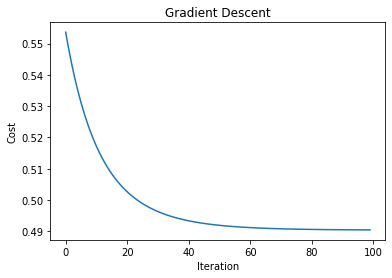

In [7]:
# Visualize your costs.
plt.plot(costs)
plt.title("Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

<!-- END QUESTION -->

# Q2

Calcuate the accuracy, precision, recall and F1 score of your logistic regression implementaion on the testing set. 
Print the results. (**4 points**)

With random_state = 123:
- Cost     : 7.615464644719344
- Accuracy : 65.57377049180327 %
- Precision: 58.97435897435898 %
- Recall   : 82.14285714285714 %
- F1 score : 0.6865671641791046

<!-- BEGIN QUESTION -->



In [8]:
def precision(y, pred):
    """Calculate precision.
    """
    y = y > 0.5
    pred = pred > 0.5
     
    TP = len(y[np.equal(pred, 1) & np.equal(y, 1)])
    FP = len(y[np.equal(pred, 1) & np.equal(y, 0)])
    
    if TP+FP == 0:
        return np.nan
    
    precision = TP/(TP+FP)
    return precision

def recall(y, pred):
    """Calculate recall.
    """
    y = y > 0.5
    pred = pred > 0.5
    
    TP = len(y[np.equal(pred, 1) & np.equal(y, 1)])
    FN = len(y[np.equal(pred, 0) & np.equal(y, 1)])
    
    if TP+FN == 0:
        return np.nan
    
    recall = TP/(TP+FN)
    return recall
    
def f1_score(y, pred):
    """Calculate F1 score.
    """
    prec = precision(y, pred)
    rec = recall(y, pred)
    
    if np.isnan(prec) or np.isnan(rec):
        return np.nan
    
    f1_score = 2 * (prec * rec)/(prec + rec)
    return f1_score

def accuracy(y, pred):
    """Calculate accuracy.
    """
    pred = pred > 0.5
    
    accuracy = np.mean(pred == y)
    return accuracy

In [9]:
pred = logistic_regression(X_test, weights)
cost = cost_function(y_test, pred) * len(y_test) # Multiply by length to undo the "mean" in mean-squared error.
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('Testing set:')
print('    Cost     :', cost)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)

Testing set:
    Cost     : 7.615464644719344
    Accuracy : 65.57377049180327 %
    Precision: 58.97435897435898 %
    Recall   : 82.14285714285714 %
    F1 score : 0.6865671641791046


<!-- END QUESTION -->

# Q3

Add a y-intercept and repeat the above tasks. Do you see any differences after adding the y-intercept?

(**4 points** - 2 for code, 1 for cost visualizaiton, 1 for description.)

With random_state = 123:
- Cost     : 7.485052006578775
- Accuracy : 70.49180327868852 %
- Precision: 66.66666666666666 %
- Recall   : 71.42857142857143 %
- F1 score : 0.689655172413793

Compared to the model without the intercept:
- Cost goes down slightly
- Accuracy slightly increases
- Precision increases (more of the heart disease postive predictions are correct)
- Recall decreases (less of all true postives are spotted)
- F1-score slightly increases.



<!-- BEGIN QUESTION -->



In [10]:
# Modify your dataset so that it supports a constant y-intercept term
# (Hint: what column would we want to add to our dataset matrix, so that when 
#        multiplied by the y-intercept, we get the same value every time?)

ones = pd.Series(np.ones((len(X)))).rename("intercept")

X_modified = pd.concat([X, ones], axis=1)

# Split dataset (with intercept)
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, 0.2)

# Set parameters, just like in Q1:
# lr = learning rate
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights (but now with a y-intercept weight)
lr = 0.2
iterations = 100
costs = []
weights = np.zeros(X_train.shape[1])

# Perform your logistic regression.
for i in range(iterations):
    pred = logistic_regression(X_train, weights)
    
    cost = cost_function(y_train, pred)
    costs.append(cost)
    
    grad = gradient(X_train, y_train, pred)
    
    weights -= lr * grad
    
    print(f"Iteration {i+1:3}: Cost: {cost:5.4f}")
    

Iteration   1: Cost: 0.5536
Iteration   2: Cost: 0.5479
Iteration   3: Cost: 0.5428
Iteration   4: Cost: 0.5381
Iteration   5: Cost: 0.5339
Iteration   6: Cost: 0.5301
Iteration   7: Cost: 0.5267
Iteration   8: Cost: 0.5235
Iteration   9: Cost: 0.5207
Iteration  10: Cost: 0.5181
Iteration  11: Cost: 0.5157
Iteration  12: Cost: 0.5136
Iteration  13: Cost: 0.5116
Iteration  14: Cost: 0.5098
Iteration  15: Cost: 0.5082
Iteration  16: Cost: 0.5067
Iteration  17: Cost: 0.5053
Iteration  18: Cost: 0.5040
Iteration  19: Cost: 0.5029
Iteration  20: Cost: 0.5018
Iteration  21: Cost: 0.5008
Iteration  22: Cost: 0.4999
Iteration  23: Cost: 0.4991
Iteration  24: Cost: 0.4983
Iteration  25: Cost: 0.4976
Iteration  26: Cost: 0.4969
Iteration  27: Cost: 0.4963
Iteration  28: Cost: 0.4957
Iteration  29: Cost: 0.4952
Iteration  30: Cost: 0.4947
Iteration  31: Cost: 0.4943
Iteration  32: Cost: 0.4939
Iteration  33: Cost: 0.4935
Iteration  34: Cost: 0.4931
Iteration  35: Cost: 0.4928
Iteration  36: Cost:

In [11]:
weights

Age          0.597788
Sex          0.619127
Chol         0.249926
intercept   -0.161794
dtype: float64

Text(0, 0.5, 'Cost')

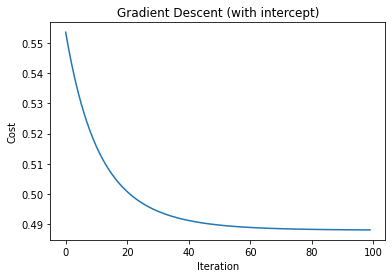

In [12]:
# Visualize your costs.
plt.plot(costs)
plt.title("Gradient Descent (with intercept)")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [13]:
# Print out metrics.
pred = logistic_regression(X_test, weights)
cost = cost_function(y_test, pred) * len(y_test) # Multiply by length to undo the "mean" in mean-squared error.
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('Testing set:')
print('    Cost     :', cost)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)

Testing set:
    Cost     : 7.485052006578775
    Accuracy : 70.49180327868852 %
    Precision: 66.66666666666666 %
    Recall   : 71.42857142857143 %
    F1 score : 0.689655172413793


<!-- END QUESTION -->

# Q4
Implement the bold driver into your gradient descent implementation, which lets us have a dynamic learning rate. Visualize the costs and print the accuracy/etc. metrics as before. Do not use a y-intercept this time.

* Add a stop condition that stop the GD when the cost is not changing more than 0.001 between iterations.
* Describe the results. Did you stop earlier than 100 iterations? 

(**4 points** - 2 for code, 1 for cost visualizaiton, 1 for description.)

With random_state = 123:
- Cost     : 7.753016617491301
- Accuracy : 67.21311475409836 %
- Precision: 60.526315789473685 %
- Recall   : 82.14285714285714 %
- F1 score : 0.6969696969696969

Compared to the other GDs:
- Metrics are roughly the same as the constant rate gradient descent without intercept.
- Higher recall and lower accuracy and precision compared to the intercept model.
- The gradient descent stopped early, giving us similiar results to the constant rate GD (w/o intercept) with quicker convergence.
  - With random_state = 123, GD stopped at iteration 26
  - Ending learning rate was $ \eta = 0.373 $


<!-- BEGIN QUESTION -->



In [14]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

# Set parameters:
# lr = learning rate (*Update this variable when implementing your bold driver.*)
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights (*no* y-intercept)
lr = 0.1
iterations = 100
costs = []
weights = np.zeros(X_train.shape[1])

pred = logistic_regression(X_train, weights)
oldcost = cost_function(y_train, pred)
grad = gradient(X_train, y_train, pred)

# Perform your logistic regression.
for i in range(iterations):
    weights1 = weights - lr * grad
    
    pred = logistic_regression(X_train, weights1)
    cost = cost_function(y_train, pred)
    grad1 = gradient(X_train, y_train, pred)
    
    if cost >= oldcost:
        lr /= 2
    else:
        lr *= 1.05
        weights = weights1
        grad = grad1
        
    costs.append(cost)

    print(f"Iteration {i+1:3}: Cost: {cost:5.4f}")

    if abs(cost - oldcost) <= 0.001:
        print(f"Stopped iteration {i}")
        break

    oldcost = cost


Iteration   1: Cost: 0.5509
Iteration   2: Cost: 0.5481
Iteration   3: Cost: 0.5454
Iteration   4: Cost: 0.5427
Iteration   5: Cost: 0.5400
Iteration   6: Cost: 0.5373
Iteration   7: Cost: 0.5347
Iteration   8: Cost: 0.5321
Iteration   9: Cost: 0.5295
Iteration  10: Cost: 0.5270
Iteration  11: Cost: 0.5246
Iteration  12: Cost: 0.5223
Iteration  13: Cost: 0.5200
Iteration  14: Cost: 0.5178
Iteration  15: Cost: 0.5157
Iteration  16: Cost: 0.5136
Iteration  17: Cost: 0.5117
Iteration  18: Cost: 0.5098
Iteration  19: Cost: 0.5081
Iteration  20: Cost: 0.5064
Iteration  21: Cost: 0.5049
Iteration  22: Cost: 0.5034
Iteration  23: Cost: 0.5020
Iteration  24: Cost: 0.5008
Iteration  25: Cost: 0.4996
Iteration  26: Cost: 0.4985
Iteration  27: Cost: 0.4975
Stopped iteration 26


In [15]:
weights

Age     0.399578
Sex     0.402019
Chol    0.171099
dtype: float64

In [16]:
lr

0.37334563223415773

Text(0, 0.5, 'Cost')

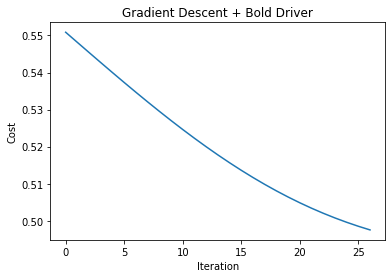

In [17]:
# Visualize your costs.
plt.plot(costs)
plt.title("Gradient Descent + Bold Driver")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [18]:
# Print out metrics.
pred = logistic_regression(X_test, weights)
cost = cost_function(y_test, pred) * len(y_test) # Multiply by length to undo the "mean" in mean-squared error.
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('Testing set:')
print('    Cost     :', cost)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)

Testing set:
    Cost     : 7.753016617491301
    Accuracy : 67.21311475409836 %
    Precision: 60.526315789473685 %
    Recall   : 82.14285714285714 %
    F1 score : 0.6969696969696969


<!-- END QUESTION -->

# Q5

Implement the L2 norm regularization.

Modify your Cost and gradient to implement the l2 norm regularization. 
Repeat the steps taken in prior tasks and describe your result. 

* Use a y-intercept.
* Do a maximum of 100 iterations as before and report your accuracy, precision, recall and F1 score. 
* **Optional**: You can stop earlier, if the cost is not changing more than 0.001 between iterations.
* **Optional**: You can use the bold driver, if you want. But a bold driver is not required to perform L2 norm regularizaiton.

(**4 points** - 2 for code, 1 for cost visualizaiton, 1 for description.)

With random_state = 123:
- Cost     : 8.233473874591176
- Accuracy : 68.85245901639344 %
- Precision: 64.51612903225806 %
- Recall   : 71.42857142857143 %
- F1 score : 0.6779661016949152

Compared to the other GDs:
- Metrics seem between the normal GD models with no intercept and with an intercept.
- Weights are much lower in general, making a simplier model at the cost of metrics to prevent overfitting.


<!-- BEGIN QUESTION -->



In [19]:
# Determine the ridge regression gradient.
def gradient_ridge(lamb, weights):
    """Compute the gradient of the ridge, which we will include in our weight
    update in addition to the weighted gradient of each coefficient."""
    grad_ridge = lamb/2 * weights.T.dot(weights)
    return grad_ridge

In [20]:
# Modify your dataset so that it supports a constant y-intercept term
# (Hint: what column would we want to add to our dataset matrix, so that when 
#        multiplied by the y-intercept, we get the same value every time?)
ones = pd.Series(np.ones((len(X)))).rename("intercept")
X_modified = pd.concat([X, ones], axis=1)

# Split dataset (with intercept)
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, 0.2)

# Set parameters, just like in Q1:
# lr = learning rate
# lamb = lambda weight for L2 regularization (*new*)
# iterations = number of iterations
# cost = mean squared error at each iteration (used to plot)
# weights = array of logistic regression weights (but now with a y-intercept weight)
lr = 0.1
lamb = 1 # Lambda weight for L2 regularization.
iterations = 100
costs = []
weights = np.zeros(X_train.shape[1])

# Perform your logistic regression, with L2 norm regularizaiton.
for i in range(iterations):
    pred = logistic_regression(X_train, weights)
    
    cost = cost_function(y_train, pred) + gradient_ridge(lamb, weights)
    costs.append(cost)
    
    grad = gradient(X_train, y_train, pred) + lamb * weights
    
    weights -= lr * grad
    
    print(f"Iteration {i+1:3}: Cost: {cost:5.4f}")


Iteration   1: Cost: 0.5536
Iteration   2: Cost: 0.5509
Iteration   3: Cost: 0.5489
Iteration   4: Cost: 0.5474
Iteration   5: Cost: 0.5464
Iteration   6: Cost: 0.5456
Iteration   7: Cost: 0.5450
Iteration   8: Cost: 0.5446
Iteration   9: Cost: 0.5443
Iteration  10: Cost: 0.5441
Iteration  11: Cost: 0.5440
Iteration  12: Cost: 0.5439
Iteration  13: Cost: 0.5439
Iteration  14: Cost: 0.5439
Iteration  15: Cost: 0.5439
Iteration  16: Cost: 0.5439
Iteration  17: Cost: 0.5439
Iteration  18: Cost: 0.5439
Iteration  19: Cost: 0.5440
Iteration  20: Cost: 0.5440
Iteration  21: Cost: 0.5440
Iteration  22: Cost: 0.5440
Iteration  23: Cost: 0.5441
Iteration  24: Cost: 0.5441
Iteration  25: Cost: 0.5441
Iteration  26: Cost: 0.5441
Iteration  27: Cost: 0.5441
Iteration  28: Cost: 0.5442
Iteration  29: Cost: 0.5442
Iteration  30: Cost: 0.5442
Iteration  31: Cost: 0.5442
Iteration  32: Cost: 0.5442
Iteration  33: Cost: 0.5442
Iteration  34: Cost: 0.5442
Iteration  35: Cost: 0.5442
Iteration  36: Cost:

In [21]:
weights

Age          0.102561
Sex          0.099977
Chol         0.045581
intercept   -0.031610
dtype: float64

Text(0, 0.5, 'Cost')

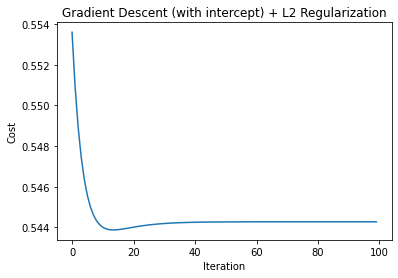

In [22]:
# Visualize your costs.
plt.plot(costs)
plt.title("Gradient Descent (with intercept) + L2 Regularization")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [23]:
# Print out metrics.
pred = logistic_regression(X_test, weights)
cost = cost_function(y_test, pred) * len(y_test) # Multiply by length to undo the "mean" in mean-squared error.
acc = accuracy(y_test, pred)
pr = precision(y_test, pred)
rc = recall(y_test, pred)
f1 = f1_score(y_test, pred)

print('Testing set:')
print('    Cost     :', cost)
print('    Accuracy :', acc*100, '%')
print('    Precision:', pr*100, '%')
print('    Recall   :', rc*100, '%')
print('    F1 score :', f1)

Testing set:
    Cost     : 8.233473874591176
    Accuracy : 68.85245901639344 %
    Precision: 64.51612903225806 %
    Recall   : 71.42857142857143 %
    F1 score : 0.6779661016949152


<!-- END QUESTION -->

